In [270]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [271]:
df = pd.read_csv('bbc_text_cls.csv')
df.head()

,text,labels
0,Ad sales boost Time Warner profit\n\nQuarterly...,business
1,Dollar gains on Greenspan speech\n\nThe dollar...,business
2,Yukos unit buyer faces loan claim\n\nThe owner...,business
3,High fuel prices hit BA's profits\n\nBritish A...,business
4,Pernod takeover talk lifts Domecq\n\nShares in...,business


In [272]:
df['target'] = df['labels'].astype("category").cat.codes

In [273]:
df.head()

,text,labels,target
0,Ad sales boost Time Warner profit\n\nQuarterly...,business,0
1,Dollar gains on Greenspan speech\n\nThe dollar...,business,0
2,Yukos unit buyer faces loan claim\n\nThe owner...,business,0
3,High fuel prices hit BA's profits\n\nBritish A...,business,0
4,Pernod takeover talk lifts Domecq\n\nShares in...,business,0


In [274]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size = 0.3)

In [275]:
from tensorflow.keras.preprocessing.text import Tokenizer

MAX_VOCAB_SIZE = 2000
tokenizer = Tokenizer(num_words = MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(df_train['text'])
sequence_train = tokenizer.texts_to_sequences(df_train['text'])
sequence_test = tokenizer.texts_to_sequences(df_test['text'])

In [276]:
word2idx = tokenizer.word_index
vocab_size = len(word2idx)
print(vocab_size)

27737


In [277]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
data_train = pad_sequences(sequence_train)
train_shape = data_train.shape[1]
print(data_train.shape)

data_test = pad_sequences(sequence_test, maxlen = train_shape)
test_shape = data_test.shape[1]
print(data_test.shape)

(1557, 3489)
(668, 3489)


In [278]:
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import GlobalMaxPooling1D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Embedding
from tensorflow.keras.models import Model

In [279]:
num_classes = df['target'].max() + 1

inp_lyr = Input(shape = (train_shape, ))
emb_lyr = Embedding(vocab_size + 1, 50)(inp_lyr)
cnv_lyr = Conv1D(32, 3, activation = 'relu')(emb_lyr)
pool_lyr = GlobalMaxPooling1D()(cnv_lyr)
dense_lyr = Dense(num_classes, activation = 'softmax')(pool_lyr)

In [280]:
model = Model(inp_lyr , dense_lyr)
model.summary()

Model: "functional_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_12 (InputLayer)     │ (None, 3489)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_12 (Embedding)        │ (None, 3489, 50)       │     1,386,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_9 (Conv1D)               │ (None, 3487, 32)       │         4,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_6          │ (None, 32)             │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 5)              │           165 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,391,897 (5.31 MB)

 Trainable params: 1,391,897 (5.31 MB)

 Non-trainable params: 0 (0.00 B)

In [281]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy

model.compile(loss = SparseCategoricalCrossentropy(from_logits = True), optimizer = 'adam', metrics = ['accuracy'])

In [282]:
r = model.fit(data_train, df_train['target'], validation_data = (data_test, df_test['target']), epochs = 50)

Epoch 1/50


c:\Users\SUKANYA DAS\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\backend\tensorflow\nn.py:599: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - accuracy: 0.2820 - loss: 1.5946 - val_accuracy: 0.6272 - val_loss: 1.4903
Epoch 2/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - accuracy: 0.7046 - loss: 1.4067 - val_accuracy: 0.8219 - val_loss: 1.1555
Epoch 3/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - accuracy: 0.8685 - loss: 0.9798 - val_accuracy: 0.8728 - val_loss: 0.6829
Epoch 4/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - accuracy: 0.9133 - loss: 0.5177 - val_accuracy: 0.9057 - val_loss: 0.4190
Epoch 5/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step - accuracy: 0.9197 - loss: 0.3174 - val_accuracy: 0.9147 - val_loss: 0.3136
Epoch 6/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - accuracy: 0.9695 - loss: 0.1872 - val_accuracy: 0.9207 - val_loss: 0.2632
Epoch 7/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - accuracy: 0.9728 - loss: 0.1532 - val_accuracy: 0.9356 - val_loss: 0.2266
Epoch 8/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - accuracy: 0.9827 - loss: 0.0959 - val_accuracy: 0.9371 - val_loss: 0.

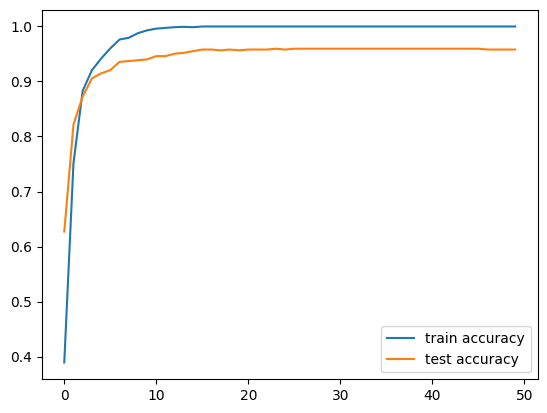

In [283]:
plt.plot(r.history['accuracy'], label = 'train accuracy')
plt.plot(r.history['val_accuracy'], label = 'test accuracy')
plt.legend()

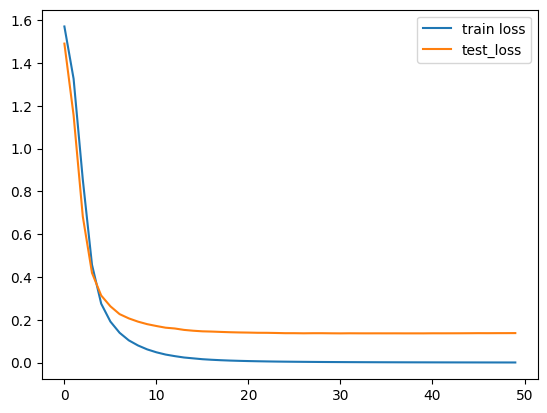

In [284]:
plt.plot(r.history['loss'], label = 'train loss')
plt.plot(r.history['val_loss'], label = 'test_loss')
plt.legend()